# [Goulib](../notebook.ipynb).expr

math expressions
(see [polynomials](polynomials.ipynb) for more)

In [1]:
from Goulib.notebook import *
from Goulib.expr import *
from Goulib.table import Table
from math import pi,sin
from Goulib.math2 import sqrt

Expr can be created from:
* numbers
* text (python-like formula)

Expr has LaTeX representation in notebooks

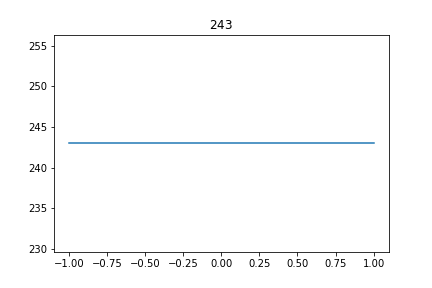

In [2]:
Expr(3**5) # is evaluated before Expr is created

In [3]:
e=Expr(3)**Expr(5) # combine Expr essions
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())


as math formula : 3^5
as python code : 3**5
evaluated : 243


In [4]:
e=Expr('5**3+(-3^2)') # ^ and ** are both considered as power operator for clarity+compatibility
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())

as math formula : 5^3-3^2
as python code : 5**3-3**2
evaluated : 116


## Functions

In [5]:
e=Expr('x^2')
h('an Expr may contain variables :',e)
h('and be evaluated as a function : for x=2, ',e,'=',e(x=2))

all functions defined in math module can be used:

In [6]:
functions=default_context.functions # functions known by default to Expr
t=Table()
for n in functions:
    f=functions[n][0] # get the function itself
    try:
        e=Expr(f)
        t.append([n,repr(e),str(e),e])
    except Exception as e:
        t.append([n,e])
t

abs,abs(x),abs(x),$${\lvert{x}\rvert}$$
acos,acos(x),acos(x),$${\arccos\left(x\right)}$$
acosh,acosh(x),acosh(x),$${\cosh^{-1}\left(x\right)}$$
asin,asin(x),asin(x),$${\arcsin\left(x\right)}$$
asinh,asinh(x),asinh(x),$${\sinh^{-1}\left(x\right)}$$
atan,atan(x),atan(x),$${\arctan\left(x\right)}$$
atan2,atan2(x),atan2(x),$${\atan2\left(x\right)}$$
atanh,atanh(x),atanh(x),$${\tanh^{-1}\left(x\right)}$$
ceil,ceil(x),ceil(x),$${\left\lceil{x}\right\rceil}$$
comb,comb(x),comb(x),$${\comb\left(x\right)}$$
copysign,copysign(x),copysign(x),$${\copysign\left(x\right)}$$


In [7]:
e=Expr(sqrt) #(Expr(pi))+Expr(1/5)
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())

as math formula : sqrt(x)
as python code : sqrt(x)
evaluated : sqrt(x)


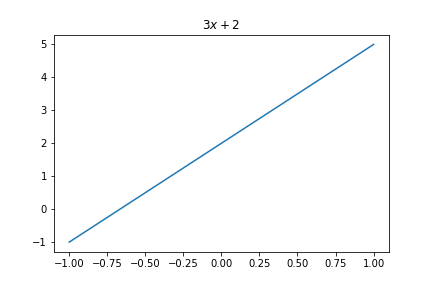

In [8]:
e1=Expr('3*x+2') #a very simple expression defined from text
e1

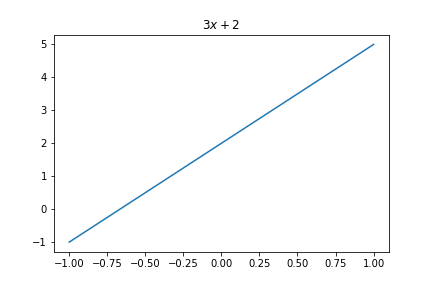

In [9]:
e1=Expr(lambda x:3*x+2) #the same expression defined from a lambda function
e1

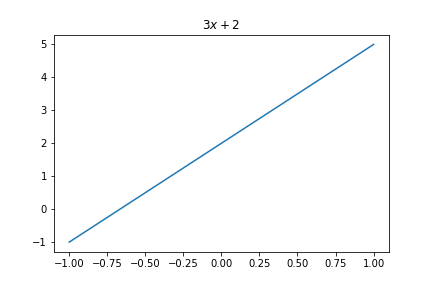

In [10]:
def f(x):
    return 3*x+2
Expr(f) #the same expression defined from a regular (simple...) function

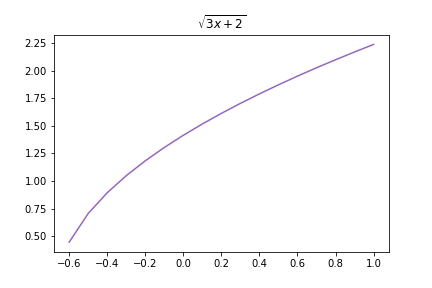

In [11]:
e3=Expr(sqrt)(e1) #Expr can be composed
e3

In [12]:
print(e3(x=1)) # Expr can be evaluated as a function
print(e3((pi-4)/6)) #the x variable is implicit

2.23606797749979
1.2533141373155001


In [13]:
e1([-2,1,0,1,2]) # Expr can be evaluated at different x values at once

[-4, 5, 2, 5, 8]

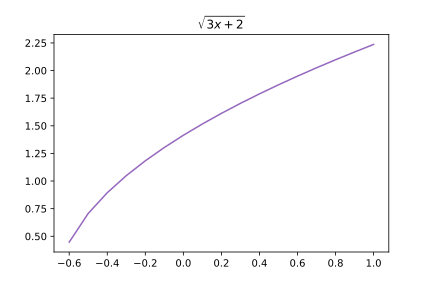

In [14]:
e3.plot()  # Expr can be also plotted. Note the X axis is automatically restricted to the definition domain

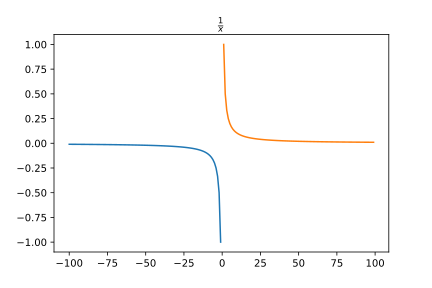

In [15]:
Expr('1/x').plot(x=range(-100,100))

## multivariable

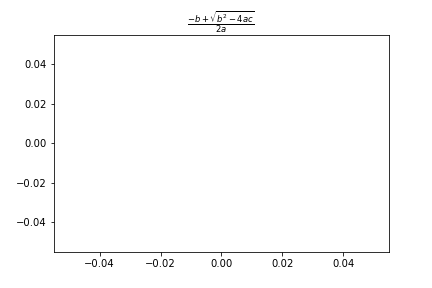

In [16]:
e=Expr('(-b+sqrt(b^2-4*a*c))/(2*a)') #laTex is rendered with some simple simplifications
e

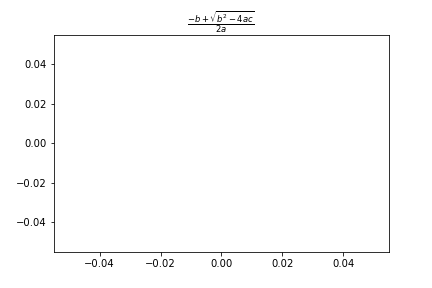

In [17]:
e(a=1) # substitution doesn't work yet ...

## complex

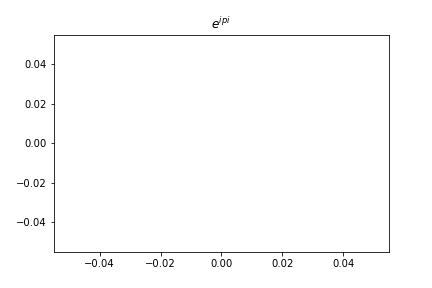

In [18]:
e=Expr("e**(i*pi)")
e

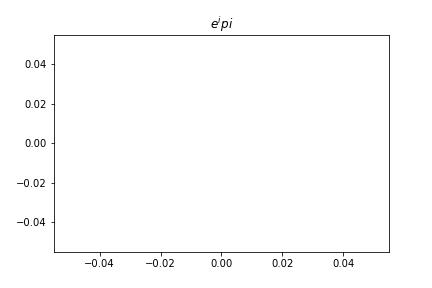

In [19]:
e() # should be -1 one day...